# MODEL TRAINING 

### 1.1 Import Data and Required Packages

#### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.


In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings


### Import the CSV Data as Pandas DataFrame

In [2]:


# Use the absolute path to the file
file_path = '/Users/georgensamuel/End to End ML project/data/raw/stud.csv'

# Read the CSV file
df = pd.read_csv(file_path)


### Show Top 5 Records

In [3]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Preparing X and Y variables

In [4]:
X = df.drop(columns='math_score')


In [5]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [6]:
# Define the columns and their labels for display
columns = {
    'gender': "Categories in 'gender' variable:",
    'race_ethnicity': "Categories in 'race_ethnicity' variable:",
    'parental_level_of_education': "Categories in 'parental level of education' variable:",
    'lunch': "Categories in 'lunch' variable:",
    'test_preparation_course': "Categories in 'test preparation course' variable:"
}

# Loop through the dictionary and print unique values for each column
for column, label in columns.items():
    print(f"{label} {df[column].unique()}")


Categories in 'gender' variable: ['female' 'male']
Categories in 'race_ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable: ['standard' 'free/reduced']
Categories in 'test preparation course' variable: ['none' 'completed']


In [7]:
y = df['math_score']


In [8]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [9]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Identify numeric and categorical features once
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

# Configure OneHotEncoder 
oh_transformer = OneHotEncoder(sparse_output=True, handle_unknown='ignore')

# Use StandardScaler for numerical features as originally.
numeric_transformer = StandardScaler()

# Optimize ColumnTransformer by enabling n_jobs for parallel processing.
preprocessor = ColumnTransformer(
    transformers=[
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ],
    remainder="passthrough",  # To handle any features you don't want to transform
    n_jobs=-1  # Enable parallel processing
)


In [10]:
X = preprocessor.fit_transform(X)

In [11]:
X.shape

(1000, 19)

### Seperate dataset into Train and Test

In [12]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

### Create an Evaluate Function to give all metrics after model Training

In [13]:
# Make sure evaluate_model returns floats and print the output
def evaluate_model(true, predicted, print_result=False):
    mae = float(mean_absolute_error(true, predicted))  # Ensure it's float
    rmse = float(np.sqrt(mean_squared_error(true, predicted)))  # Ensure it's float
    r2_square = float(r2_score(true, predicted))  # Ensure it's float

    if print_result:
        print(f"Mean Absolute Error (MAE): {mae:.4f}")
        print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
        print(f"R-Squared (R2): {r2_square:.4f}")

    return mae, rmse, r2_square


In [15]:
# Iterate through the dictionary of models
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate model performance on training data
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    
    # Evaluate model performance on test data
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    # Print results for current model
    print(f'{model_name}')
    print('Model performance for Training set')
    print(f"- Mean Absolute Error: {model_train_mae:.4f}")
    print(f"- Root Mean Squared Error: {model_train_rmse:.4f}")
    print(f"- R2 Score: {model_train_r2:.4f}")
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print(f"- Mean Absolute Error: {model_test_mae:.4f}")
    print(f"- Root Mean Squared Error: {model_test_rmse:.4f}")
    print(f"- R2 Score: {model_test_r2:.4f}")
    
    print('='*35)
    print('\n')


Linear Regression
Model performance for Training set
- Mean Absolute Error: 4.2667
- Root Mean Squared Error: 5.3231
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Mean Absolute Error: 4.2148
- Root Mean Squared Error: 5.3940
- R2 Score: 0.8804


Lasso
Model performance for Training set
- Mean Absolute Error: 5.2063
- Root Mean Squared Error: 6.5938
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Mean Absolute Error: 5.1579
- Root Mean Squared Error: 6.5197
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Mean Absolute Error: 4.2650
- Root Mean Squared Error: 5.3233
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Mean Absolute Error: 4.2111
- Root Mean Squared Error: 5.3904
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Training set
- Mean Absolute Error: 4.5252
- Root Mean Squared Error: 5.7167
- R2 Score: 0.8550
-----------------------

## Results 

In [16]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880433
5,Random Forest Regressor,0.852257
7,CatBoosting Regressor,0.851632
8,AdaBoost Regressor,0.849272
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783754
4,Decision Tree,0.752053


## Linear Regression 

In [17]:

# Initialize and fit the model
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)

# Make predictions
y_pred = lin_model.predict(X_test)

# Calculate the R2 score (accuracy) and convert it to percentage
score = r2_score(y_test, y_pred) * 100

# Print the accuracy
print("Accuracy of the model is %.2f" % score)


Accuracy of the model is 88.04


### Plot y_pred and y_test


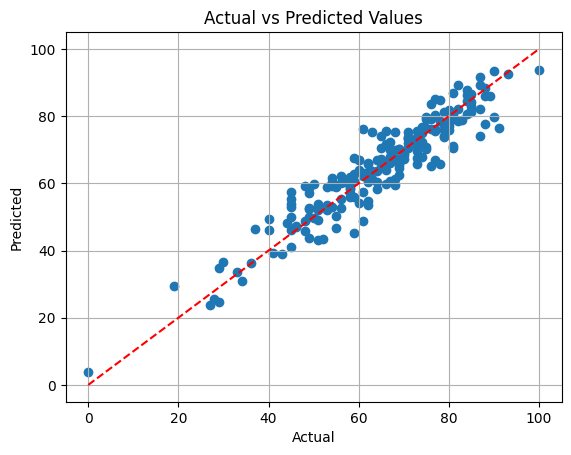

In [19]:
# Scatter plot of Actual vs Predicted with reference line
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # 45-degree line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()


<Axes: xlabel='math_score'>

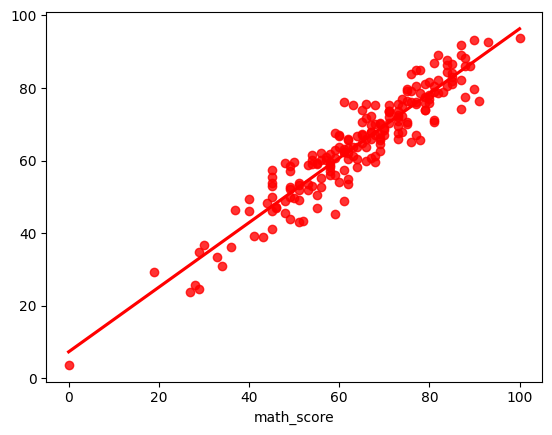

In [21]:
# Regression plot of Actual vs Predicted values
sns.regplot(x=y_test, y=y_pred, ci=None, color='red')



### Difference between Actual and Predicted Values


In [22]:
pred_df = pd.DataFrame({
    'Actual Value': y_test,
    'Predicted Value': y_pred,
    'Difference': y_test - y_pred
})

# Display the DataFrame
print(pred_df)

     Actual Value  Predicted Value  Difference
521            91        76.387970   14.612030
737            53        58.885970   -5.885970
740            80        76.990265    3.009735
660            74        76.851804   -2.851804
411            84        87.627378   -3.627378
..            ...              ...         ...
408            52        43.409149    8.590851
332            62        62.152214   -0.152214
208            74        67.888395    6.111605
613            65        67.022287   -2.022287
78             61        62.345132   -1.345132

[200 rows x 3 columns]


In [23]:
mean_diff = pred_df['Difference'].mean()
print("Mean difference (bias):", mean_diff)


Mean difference (bias): -0.23703860181621228


In [24]:
pred_df['Absolute Difference'] = abs(pred_df['Difference'])
print(pred_df)


     Actual Value  Predicted Value  Difference  Absolute Difference
521            91        76.387970   14.612030            14.612030
737            53        58.885970   -5.885970             5.885970
740            80        76.990265    3.009735             3.009735
660            74        76.851804   -2.851804             2.851804
411            84        87.627378   -3.627378             3.627378
..            ...              ...         ...                  ...
408            52        43.409149    8.590851             8.590851
332            62        62.152214   -0.152214             0.152214
208            74        67.888395    6.111605             6.111605
613            65        67.022287   -2.022287             2.022287
78             61        62.345132   -1.345132             1.345132

[200 rows x 4 columns]
